In [1]:
import json
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def findGT(input_text):
    index = input_text.find("Ground truth")
    
    if index != -1:
        first_occurrence = input_text[index:]
        # print(first_occurrence.split('.')[0][14:])
    else:
        print("Not found")
        
    ground_truth = first_occurrence.split(' ')[2].strip()

    return ground_truth

In [3]:
def is_number(value):
    if isinstance(value, (int, float, complex)):
        return True
    elif isinstance(value, str) and value.isnumeric():
        return True
    else:
        return False

In [4]:
def qsType(ans):
    if ans.lower() == 'yes' or ans.lower()== 'no':
        return 'yes-no'
    elif is_number(ans):
        return 'number'
    elif ans in ["cube", "sphere", "cylinder"] :
        return 'shape'
    elif ans in  ["small", "large"]:
        return 'size'
    elif ans in [ "left", "right", "behind", "front"]:
        return 'relation'
    elif ans in [ "gray", "red", "blue", "green", "brown", "purple", "cyan", "yellow"]:
        return 'colour'
    elif ans in ["rubber", "metal"]:
        return 'material'
    
    return 'none'

In [42]:
EVAL_PATH = '/home/averma90/CSE576/github/MLLM_Hallucinations/CLEVR_v1/eval/val/num_objects_based_difficulty_vanilla'  
files = glob.glob(os.path.join(EVAL_PATH, '*.json'), recursive=True)
complete_results = []
for path in files:
    results_file = open(os.path.join(EVAL_PATH, f"results/{path.split('/')[-1]}"), 'w')
    results = {}
    print(path)                
    with open(path, 'r') as file:
        evals = json.load(file)
        y = 0
        n = 0
        unknown = 0
        for eval in evals:
            gt = findGT(eval)
            question_type = qsType(gt)
            consistent = eval.split('Consistent:')[-1]
            correct = "unknown"
            
            if 'yes' in consistent.lower() or 'true' in consistent.lower():
                correct = "correct"
                y += 1
            elif 'no' in consistent.lower() or 'false' in consistent.lower():
                correct = "incorrect"
                n += 1
            else:
                unknown += 1

            key = f"{question_type}"
            if key in results.keys():
                    results[key][correct] += 1
                    results[key]['total'] += 1
            else:
                results[key] = {'correct': 0, 'incorrect': 0, 'unknown': 0, 'total': 1}
                results[key][correct] = 1

            # break
        
        results['yes'] = y
        results['no'] = n
        results['unknown'] = unknown
        
        sorted_items = sorted(results.items(), key=lambda x: x[0])
        
        sorted_dict = dict(sorted_items)

        for key in ['yes-no', 'number', 'shape', 'size', 'relation', 'colour', 'material']:
            # print(key)
            if key in results.keys():
                sorted_dict["accuracy_" + key] = results[key]['correct']/(results[key]['correct'] + results[key]['incorrect'])
        if y+n > 0:
            sorted_dict["accuracy"] = results['yes']/(results['no']+results['yes'])
        json.dump(sorted_dict, results_file)
        results_file.close()
        print(y, n, unknown)
        if y+n>0:
            print(y/(y+n))
    

/home/averma90/CSE576/github/MLLM_Hallucinations/CLEVR_v1/eval/val/num_objects_based_difficulty_vanilla/num_3.json
4787 5202 3
0.4792271498648513
/home/averma90/CSE576/github/MLLM_Hallucinations/CLEVR_v1/eval/val/num_objects_based_difficulty_vanilla/num_6.json
4352 5643 5
0.4354177088544272
/home/averma90/CSE576/github/MLLM_Hallucinations/CLEVR_v1/eval/val/num_objects_based_difficulty_vanilla/num_10.json
4137 5856 7
0.4139897928549985
/home/averma90/CSE576/github/MLLM_Hallucinations/CLEVR_v1/eval/val/num_objects_based_difficulty_vanilla/num_8.json
4214 5782 4
0.4215686274509804


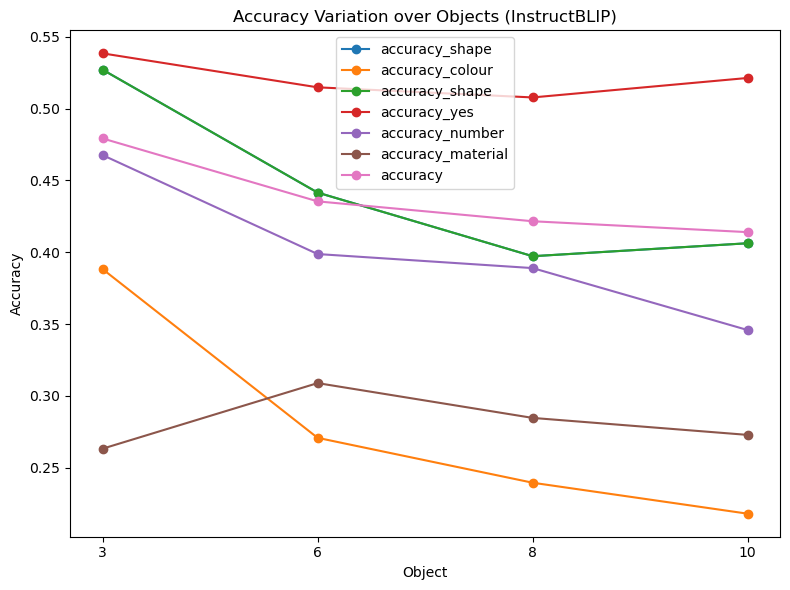

In [6]:
results = []

for i in [3, 6, 8, 10]:
    with open(f"/home/averma90/CSE576/github/MLLM_Hallucinations/CLEVR_v1/eval/val/num_objects_based_difficulty_vanilla/results/num_{i}.json", 'r') as file:
        data = json.load(file)
        
        results.append(data)

accuracy_shape = [obj['accuracy_size'] for obj in results]
accuracy_colour = [obj['accuracy_colour'] for obj in results]
accuracy_shape = [obj['accuracy_shape'] for obj in results]
accuracy_yes = [obj['accuracy_yes-no'] for obj in results]
accuracy_number = [obj['accuracy_number'] for obj in results]
# accuracy_colour = [obj['accuracy_relation'] for obj in results]
accuracy_material = [obj['accuracy_material'] for obj in results]
accuracy = [obj['accuracy'] for obj in results]

# Create x values (assuming one data point per object)
x = range(3, len(results) + 3)

# Create line plots
plt.figure(figsize=(8, 6))
plt.plot(x, accuracy_shape, marker='o', label='accuracy_shape')
plt.plot(x, accuracy_colour, marker='o', label='accuracy_colour')
plt.plot(x, accuracy_shape, marker='o', label='accuracy_shape')
plt.plot(x, accuracy_yes, marker='o', label='accuracy_yes')
plt.plot(x, accuracy_number, marker='o', label='accuracy_number')
plt.plot(x, accuracy_material, marker='o', label='accuracy_material')
plt.plot(x, accuracy, marker='o', label='accuracy')
plt.xticks(x, [3, 6, 8, 10])
# Set labels and title
plt.xlabel('Object')
plt.ylabel('Accuracy')
plt.title('Accuracy Variation over Objects (InstructBLIP)')
# Set legend
plt.legend()

# Show the plot
plt.tight_layout()

plt.savefig('/home/averma90/CSE576/github/MLLM_Hallucinations/CLEVR_v1/eval/val/num_objects_based_difficulty_vanilla/results/instruct_blip_eval_1000_images.png')
plt.show()


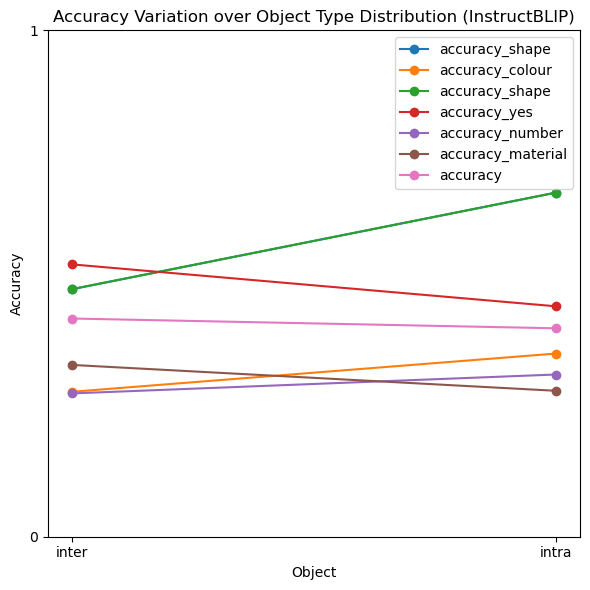

In [8]:
results = []

for i in ['inter', 'intra']:
    # print(i)
    with open(f"/home/averma90/CSE576/github/MLLM_Hallucinations/CLEVR_v1/eval/val/results/type_{i}.json", 'r') as file:
        data = json.load(file)
        
        results.append(data)

accuracy_shape = [obj['accuracy_size'] for obj in results]
accuracy_colour = [obj['accuracy_colour'] for obj in results]
accuracy_shape = [obj['accuracy_shape'] for obj in results]
accuracy_yes = [obj['accuracy_yes-no'] for obj in results]
accuracy_number = [obj['accuracy_number'] for obj in results]
# accuracy_colour = [obj['accuracy_relation'] for obj in results]
accuracy_material = [obj['accuracy_material'] for obj in results]
accuracy = [obj['accuracy'] for obj in results]

# Create x values (assuming one data point per object)
x = ['inter', 'intra']

# Create line plots
plt.figure(figsize=(6, 6))
plt.plot(x, accuracy_shape, marker='o', label='accuracy_shape')
plt.plot(x, accuracy_colour, marker='o', label='accuracy_colour')
plt.plot(x, accuracy_shape, marker='o', label='accuracy_shape')
plt.plot(x, accuracy_yes, marker='o', label='accuracy_yes')
plt.plot(x, accuracy_number, marker='o', label='accuracy_number')
plt.plot(x, accuracy_material, marker='o', label='accuracy_material')
plt.plot(x, accuracy, marker='o', label='accuracy')

# Set labels and title
plt.xlabel('Object')
plt.ylabel('Accuracy')
plt.title('Accuracy Variation over Object Type Distribution (InstructBLIP)')
plt.yticks([0, 1])

plt.legend()
plt.tight_layout()
plt.savefig('/home/averma90/CSE576/github/MLLM_Hallucinations/CLEVR_v1/eval/val/results/baselines_inter_intra_3k.png')
# Show the plot
plt.show()